##Resources Available
##The historical data for this project is available in file
##https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


##Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
##1. Univariate analysis (12 marks)
##a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
##b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
##c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
df = pd.read_csv("bank-full.csv")


In [3]:
df2 = pd.read_csv("bank-full.csv")

In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Looks Like Balance has a incorrect imputation because there is a high negative value,  and does not make sense to have negative money in an account,  I will use an absolute value There.


In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## Categoricals job marital  education  default  housing  loan contact  month poutcome Target 

In [10]:
df.nunique()###  job marital  education  default  housing  loan contact  month poutcome Target 

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [11]:
df['job'].value_counts() 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
df['job'].value_counts(normalize = True) 

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [13]:
pd.crosstab(df['job'], df['education'],normalize='all')*100

education,primary,secondary,tertiary,unknown
job,,,,
admin.,0.462277,9.331800,1.265179,0.378227
blue-collar,8.312136,11.879852,0.329566,1.004180
entrepreneur,0.404769,1.198823,1.517330,0.168101
housemaid,1.386831,0.873681,0.382650,0.099533
management,0.650284,2.479485,17.254650,0.535268
retired,1.758422,2.176461,0.809538,0.263210
self-employed,0.287541,1.276238,1.842472,0.086262
services,0.763089,7.646369,0.446794,0.331778
student,0.097321,1.123620,0.493243,0.360532


### job: Unknown is going to be replaced with unemployed because the education level match with that.
### I will asign numbers to every job giving more weight to the jobs with more contacts (ej Blue collar 11 because    the mode)

In [14]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [15]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [16]:
df['education'].value_counts(normalize = all)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

### education; More than 50% has Secondary School so 'unknown values' are going to be replaced with the mode Secondary

In [17]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [18]:
df['default'].value_counts(normalize = all)*100

no     98.197341
yes     1.802659
Name: default, dtype: float64

### default; 98% of the contacts are in default, so we may focus on the ones that are paying on time

In [19]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [20]:
df['housing'].value_counts(normalize = all)*100

yes    55.583818
no     44.416182
Name: housing, dtype: float64

### housing; 55% of the contacts has a house Loan.

In [21]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [22]:
df['loan'].value_counts(normalize = all)*100

no     83.977351
yes    16.022649
Name: loan, dtype: float64

### loan; 83.97 of the contacts has a personal Loan

In [23]:
df['contact'].value_counts()


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [24]:
df['contact'].value_counts(normalize = True)  


cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

###  contact; Most than 64% is cellular and Telephone only 6%, so 'unknown values' are going to be replaced with cellular which is the mode.

In [25]:
df['month'].value_counts()# Month will not be a useful column

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [26]:
df['month'].value_counts(normalize = all)# Month will not be a useful column

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

### I will transform Months into Quarters and numbers as shown below, and look for some insights and or potential correlation but i will remove it, due to will add more complexity to the model and will not be a useful   variable.
### January, February, and March (Q1) =  1
### April, May, and June (Q2) = 2
### July, August, and September (Q3) = 3
### October, November, and December (Q4) = 4

In [27]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [28]:
df['poutcome'].value_counts(normalize = True)*100

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

### poutcome; This is a serious problem because we do not know the 81.74% of the outcome of our marketing campaign.

In [29]:
pd.crosstab(df['Target'], df['poutcome'],normalize='all')*100

poutcome,failure,other,success,unknown
Target,,,,
no,9.473358,3.390768,1.178917,74.258477
yes,1.366924,0.679038,2.163190,7.489328


### poutcome; Unknown values are going to be replaced with failure because those values do not have a term deposit subscription which means the marketing campaing failed.

In [30]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [31]:
df['Target'].value_counts(normalize = True)*100 

no     88.30152
yes    11.69848
Name: Target, dtype: float64

### Target is umbalanced because 88.3% of the contact does not have a term deposit.

In [32]:
df['pdays'].value_counts(normalize = True)*100## Pday

-1      81.736745
 182     0.369379
 92      0.325142
 183     0.278693
 91      0.278693
          ...    
 749     0.002212
 717     0.002212
 589     0.002212
 493     0.002212
 32      0.002212
Name: pdays, Length: 559, dtype: float64

In [33]:
df['pdays'].value_counts()#.sum## Pdays

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

## pdays; can be removed because is highly skewd and most values are -1

### Columns with Yes and No values are to be changed to 0's and 1's to have a full numeric model and to make easier to work with the data

In [34]:
e = df[df['balance'] < 0]
e

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


### Balance has negative numbers, I will change them using abosulte value, because is not possible to negative money on an account.



In [35]:
x = df['Target']
x


0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Target, Length: 45211, dtype: object

In [36]:
pd.crosstab(df['Target'], df['pdays'],normalize='all')*100

pdays,-1,1,2,3,4,5,6,7,8,9,...,805,808,826,828,831,838,842,850,854,871
Target,,,,,,,,,,,,,,,,,,,,,
no,74.251841,0.019907,0.077415,0.002212,0.002212,0.02433,0.019907,0.015483,0.055296,0.019907,...,0.000000,0.002212,0.002212,0.000000,0.002212,0.002212,0.000000,0.002212,0.000000,0.002212
yes,7.484904,0.013271,0.004424,0.000000,0.002212,0.00000,0.002212,0.000000,0.000000,0.006636,...,0.002212,0.000000,0.000000,0.002212,0.000000,0.000000,0.002212,0.000000,0.002212,0.000000


### AROUND 81% of contacts on the data Set has not been contacted in more than 900 days, and 74% of them has NO as target, meaning that lack of attention on those contacts may be a contributor to do not subscribe a term deposit.

In [37]:
df2.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

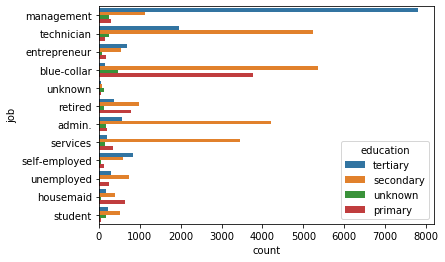

In [38]:
sns.countplot(y="job", hue="education", data=df2)

In [39]:
change = {"default": {"yes": 1, "no":0 },
                "loan": {"yes": 1, "no":0 },
                "housing": {"yes": 1, "no":0 },
                "Target": {"yes": 1, "no":0 },
                "month":  {"jan": 1, "feb": 1, "mar": 1, "apr": 2, "may":2, "jun":2, "jul" :3, "aug":3, "sep":3, "oct":4, "nov":4, "dec":4},
                "contact": {"cellular": 2, "unknown":2, "telephone":1 },
                "education": {"primary": 1, "unknown":2, "secondary":2, "tertiary":3 },
                "poutcome": {"other": 1, "unknown":2, "failure":2, "success":3 },
                "job": {"blue-collar":11, "management":10,"technician":9, "admin.":8, "services":7, "retired":6, "self-employed":5, "entrepreneur":4, "unemployed":3, "housemaid":2, "student":1, "unknown":3}
                  
 
                
                    }
                   
change
                                                

  

{'default': {'yes': 1, 'no': 0},
 'loan': {'yes': 1, 'no': 0},
 'housing': {'yes': 1, 'no': 0},
 'Target': {'yes': 1, 'no': 0},
 'month': {'jan': 1,
  'feb': 1,
  'mar': 1,
  'apr': 2,
  'may': 2,
  'jun': 2,
  'jul': 3,
  'aug': 3,
  'sep': 3,
  'oct': 4,
  'nov': 4,
  'dec': 4},
 'contact': {'cellular': 2, 'unknown': 2, 'telephone': 1},
 'education': {'primary': 1, 'unknown': 2, 'secondary': 2, 'tertiary': 3},
 'poutcome': {'other': 1, 'unknown': 2, 'failure': 2, 'success': 3},
 'job': {'blue-collar': 11,
  'management': 10,
  'technician': 9,
  'admin.': 8,
  'services': 7,
  'retired': 6,
  'self-employed': 5,
  'entrepreneur': 4,
  'unemployed': 3,
  'housemaid': 2,
  'student': 1,
  'unknown': 3}}

In [40]:
onehot = ["marital"]
onehot

['marital']

In [41]:
df2=df2.replace(change)
#mdf=pd.get_dummies(df2, columns=onehot)

In [42]:
df2


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,10,married,3,0,2143,1,0,2,5,2,261,1,-1,0,2,0
1,44,9,single,2,0,29,1,0,2,5,2,151,1,-1,0,2,0
2,33,4,married,2,0,2,1,1,2,5,2,76,1,-1,0,2,0
3,47,11,married,2,0,1506,1,0,2,5,2,92,1,-1,0,2,0
4,33,3,single,2,0,1,0,0,2,5,2,198,1,-1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,married,3,0,825,0,0,2,17,4,977,3,-1,0,2,1
45207,71,6,divorced,1,0,1729,0,0,2,17,4,456,2,-1,0,2,1
45208,72,6,married,2,0,5715,0,0,2,17,4,1127,5,184,3,3,1
45209,57,11,married,2,0,668,0,0,1,17,4,508,4,-1,0,2,0


In [43]:
df2["default"] = pd.to_numeric(df2["default"])
df2["loan"] = pd.to_numeric(df2["loan"])
df2["housing"] = pd.to_numeric(df2["housing"])
df2["Target"] = pd.to_numeric(df2["Target"])
df2["month"] = pd.to_numeric(df2["month"])
df2["contact"] = pd.to_numeric(df2["contact"])
df2["education"] = pd.to_numeric(df2["education"])
df2["poutcome"] = pd.to_numeric(df2["poutcome"])
df2["poutcome"] = pd.to_numeric(df2["poutcome"])
df2["marital"] = pd.Categorical(df2["marital"])


### Last line we Changed all data types to make sure we will not have any issue managing the Data.
### I Changed Objects to numeric Values to be able to see if is ther is correlation between Variables that did not appear on first heat map.

In [44]:
df2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,10,married,3,0,2143,1,0,2,5,2,261,1,-1,0,2,0
1,44,9,single,2,0,29,1,0,2,5,2,151,1,-1,0,2,0
2,33,4,married,2,0,2,1,1,2,5,2,76,1,-1,0,2,0
3,47,11,married,2,0,1506,1,0,2,5,2,92,1,-1,0,2,0
4,33,3,single,2,0,1,0,0,2,5,2,198,1,-1,0,2,0


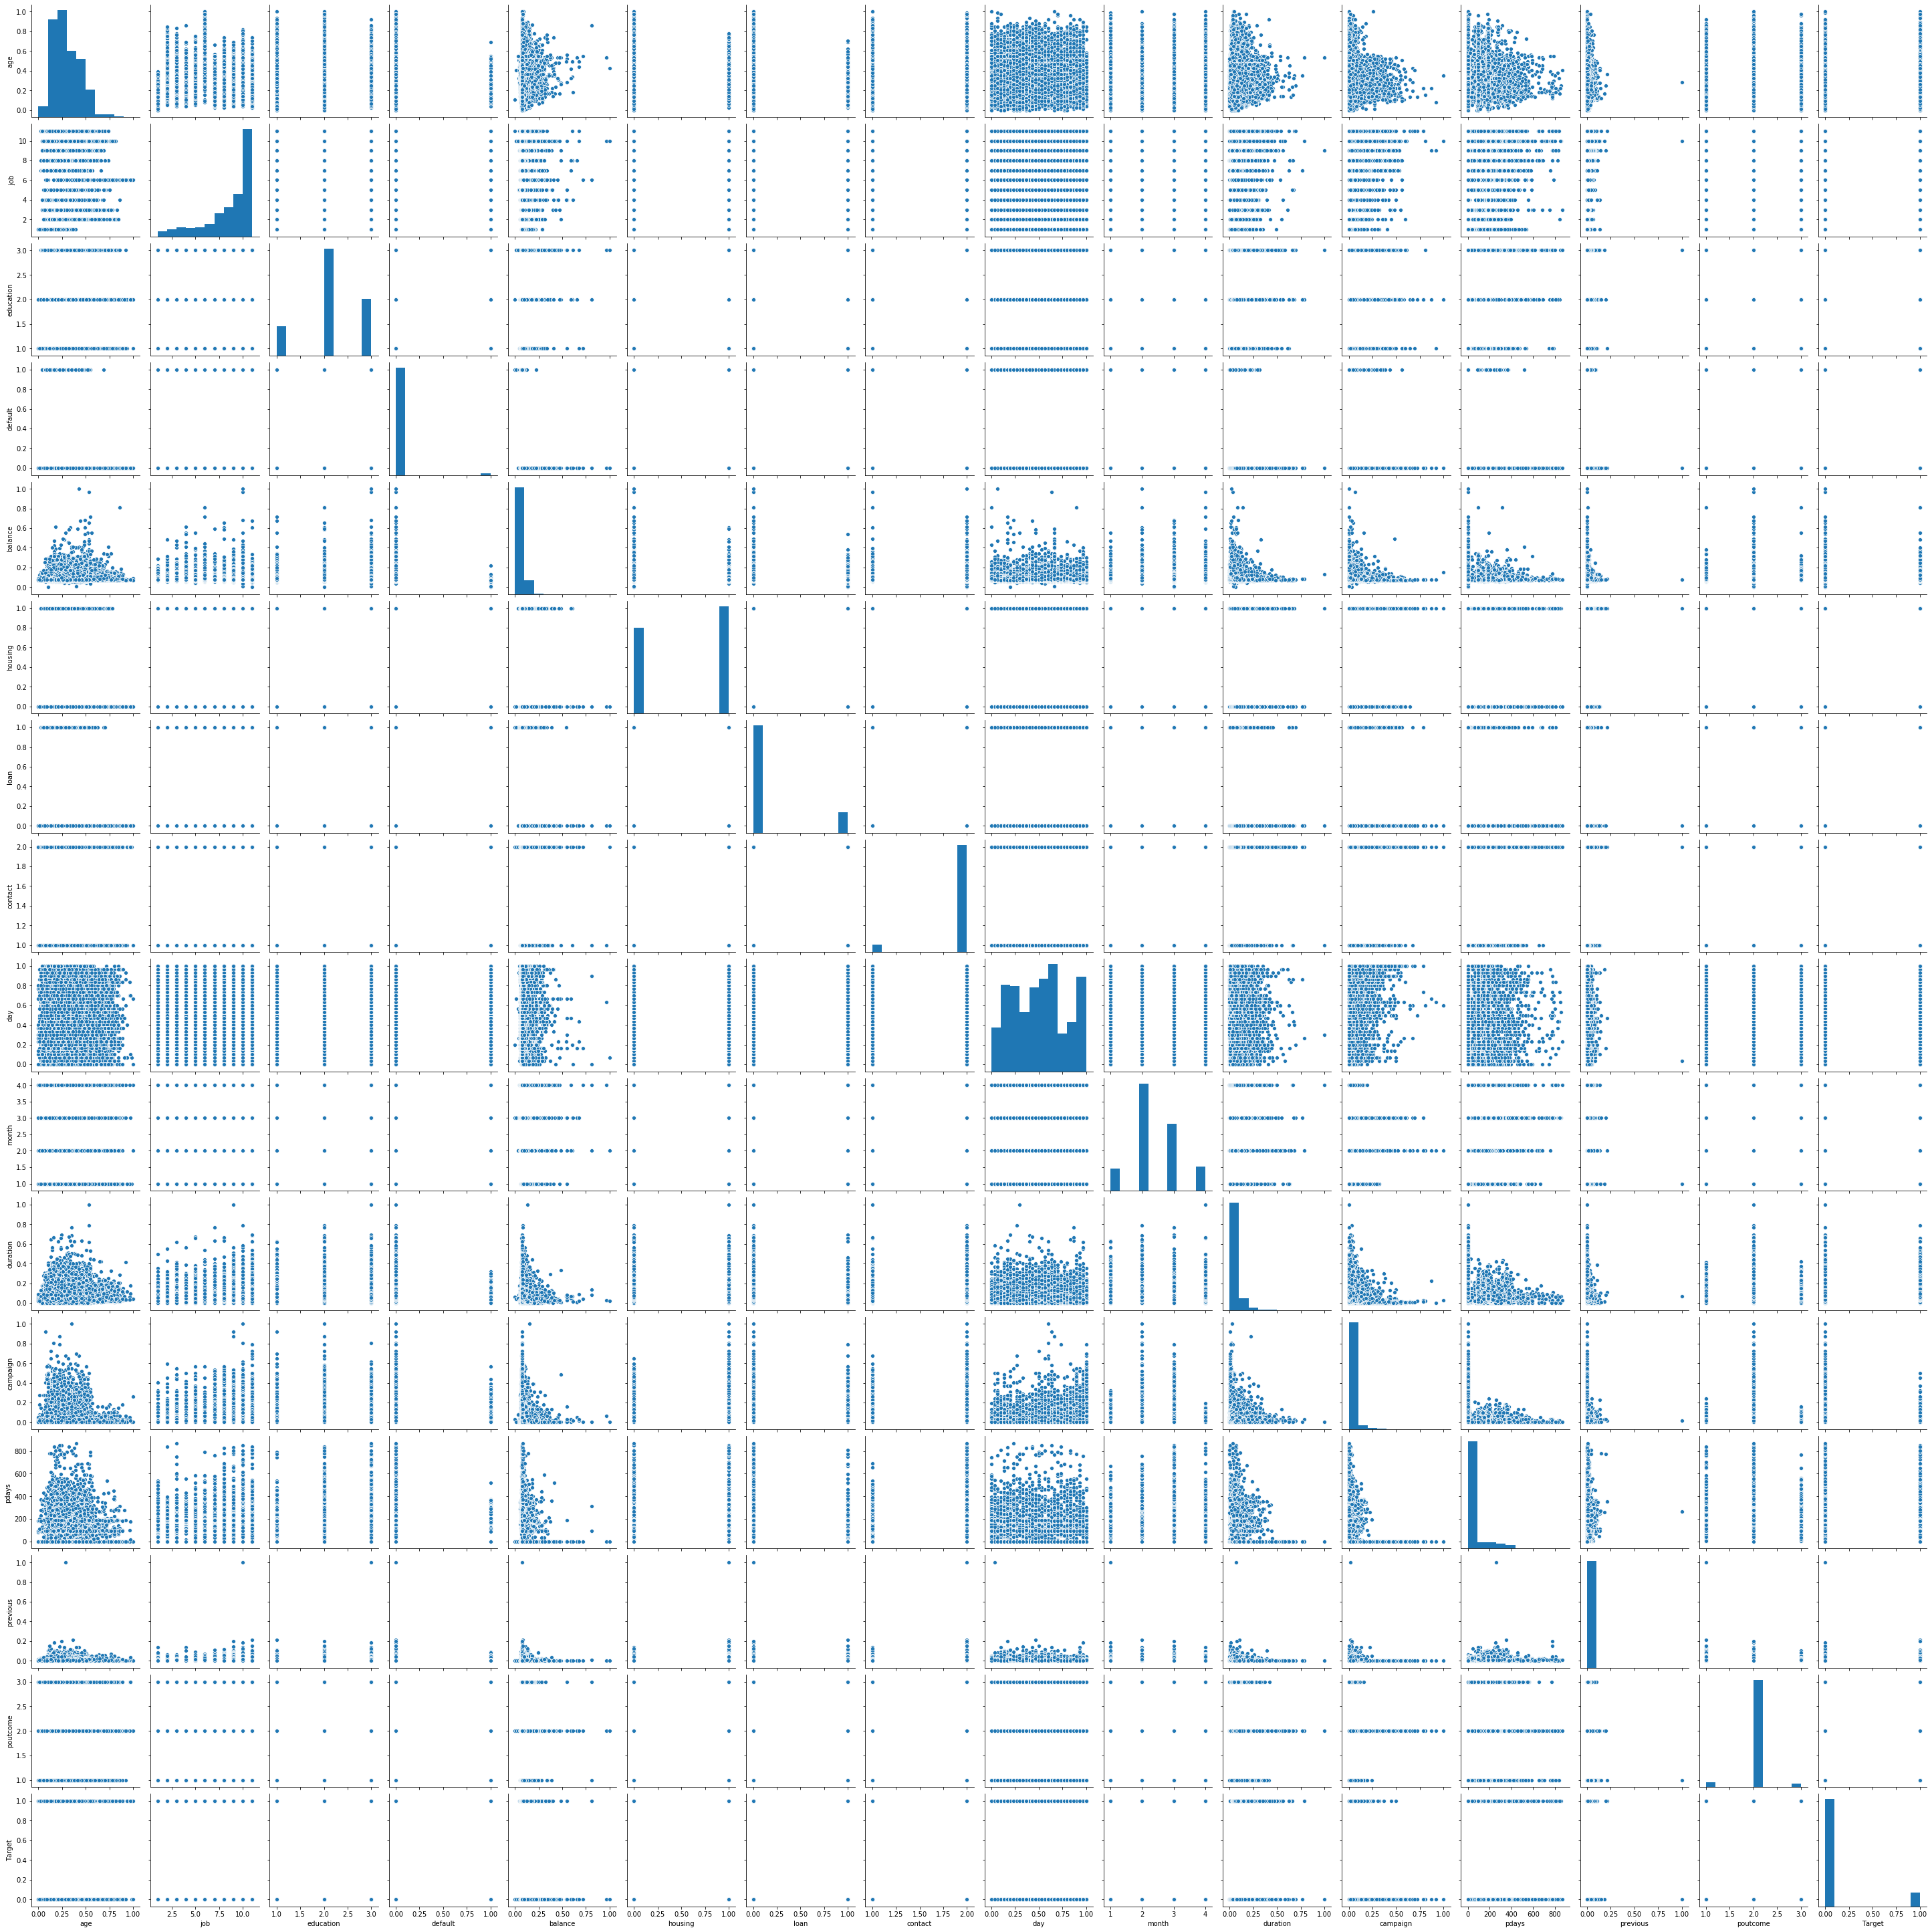

In [108]:
sns.pairplot(df2)#, hue = 'Target'

In [46]:
cor2 = df2.corr()
cor2

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.074348,-0.164888,-0.017879,0.097783,-0.185513,-0.015655,-0.170349,-0.009120,0.081964,-0.004648,0.004760,-0.023758,0.001288,0.040137,0.025155
job,-0.074348,1.000000,0.028444,0.002715,-0.019804,0.172143,0.033084,0.063280,0.010058,-0.012356,-0.005075,0.027213,0.019608,0.001644,-0.029929,-0.060112
education,-0.164888,0.028444,1.000000,-0.011539,0.067184,-0.075157,-0.025282,0.070190,0.025931,0.075295,0.002635,0.003703,0.004264,0.025175,0.029400,0.068633
default,-0.017879,0.002715,-0.011539,1.000000,-0.066745,-0.006025,0.077234,0.017208,0.009424,0.017542,-0.010021,0.016822,-0.029979,-0.018329,-0.004929,-0.022419
balance,0.097783,-0.019804,0.067184,-0.066745,1.000000,-0.068768,-0.084350,-0.037999,0.004503,0.079281,0.021560,-0.014578,0.003435,0.016674,0.017127,0.052838
housing,-0.185513,0.172143,-0.075157,-0.006025,-0.068768,1.000000,0.041323,0.080822,-0.027982,-0.160485,0.005075,-0.023599,0.124178,0.037076,-0.089166,-0.139173
loan,-0.015655,0.033084,-0.025282,0.077234,-0.084350,0.041323,1.000000,0.013183,0.011370,0.047801,-0.012412,0.009980,-0.022754,-0.011043,-0.028866,-0.068185
contact,-0.170349,0.063280,0.070190,0.017208,-0.037999,0.080822,0.013183,1.000000,-0.023652,-0.064125,0.023201,-0.053895,-0.016006,-0.028097,0.013539,-0.014042
day,-0.009120,0.010058,0.025931,0.009424,0.004503,-0.027982,0.011370,-0.023652,1.000000,0.175818,-0.030206,0.162490,-0.093044,-0.051710,0.003900,-0.028348
month,0.081964,-0.012356,0.075295,0.017542,0.079281,-0.160485,0.047801,-0.064125,0.175818,1.000000,-0.002093,0.052432,-0.098044,-0.032884,0.059893,0.015064


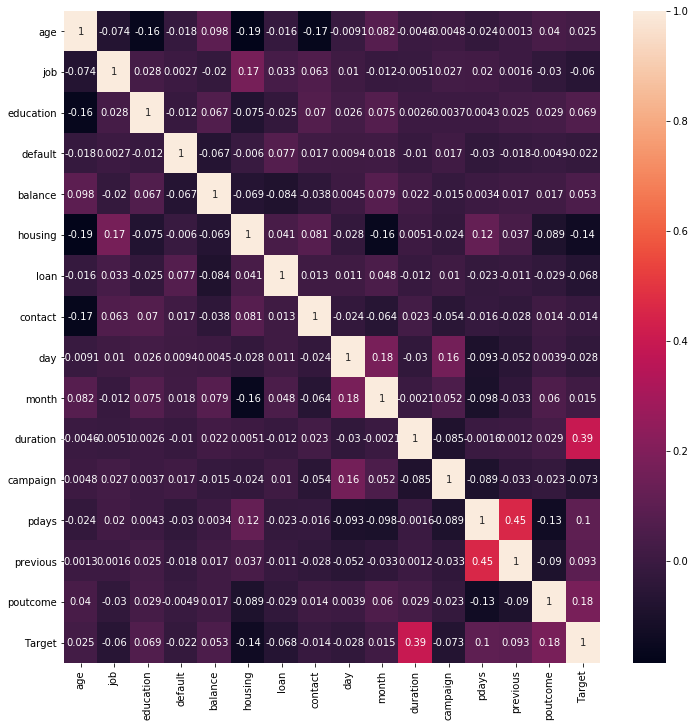

In [47]:
plt.figure(figsize=(12,12))
sns.heatmap(cor2, annot = True)
plt.show()

###  Theres is no high correlation within variables(age, default, balance, housing, loan, day, duration, campaign, pdays & previous) vs target, only there is a low positive correlation within Target vs duration 0.39. Overal speaking there are not high correlations.

In [48]:
df2.dtypes

age             int64
job             int64
marital      category
education       int64
default         int64
balance         int64
housing         int64
loan            int64
contact         int64
day             int64
month           int64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome        int64
Target          int64
dtype: object

### All Variables are in correct format now.

### High Skewness will afect performance of our Model, these variables are going to be transformed to hav a normal distribution.

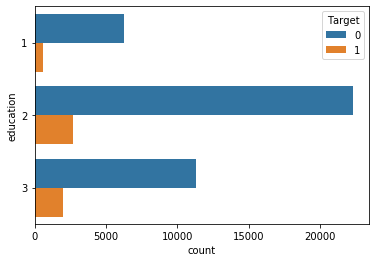

In [50]:
sns.countplot(y="education", hue="Target", data=df2)


### People with secondary education is the largest group with NO subscription.

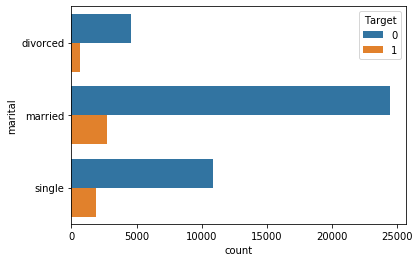

In [51]:
sns.countplot(y="marital", hue="Target", data=df2)

### Married People trends more to do not use the Term deposit subscription.

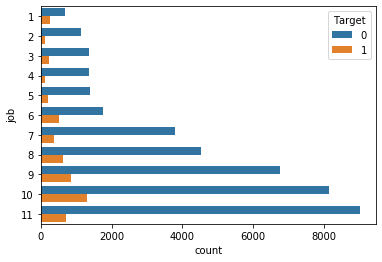

In [52]:
sns.countplot(y="job", hue="Target", data=df2)

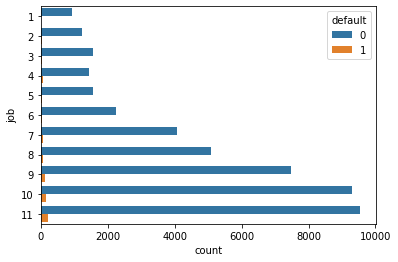

In [53]:
sns.countplot(y="job", hue="default", data=df2)

In [54]:
pd.crosstab(df2.default, df2.job)

job,1,2,3,4,5,6,7,8,9,10,11
default,,,,,,,,,,,
0,935,1218,1559,1432,1546,2238,4079,5097,7467,9294,9531
1,3,22,32,55,33,26,75,74,130,164,201


In [55]:
pd.crosstab(df2.pdays, [df2.Target, df.job])


Target      0                                                        \
job    admin. blue-collar entrepreneur housemaid management retired   
pdays                                                                 
-1       3700        7591         1166      1013       6853    1466   
 1          1           2            1         1          2       1   
 2          4           5            3         1         10       1   
 3          0           0            0         0          0       0   
 4          0           0            0         0          0       0   
...       ...         ...          ...       ...        ...     ...   
 838        0           1            0         0          0       0   
 842        0           0            0         0          0       0   
 850        0           0            0         0          1       0   
 854        0           0            0         0          0       0   
 871        0           0            0         0          0       0   

Target                                            ...            1            \
job    self-employed services student technician  ... entrepreneur housemaid   
pdays                                             ...                          
-1              1176     3198     503       5697  ...           96        75   
 1                 0        0       0          1  ...            0         1   
 2                 0        2       0          7  ...            0         0   
 3                 0        0       1          0  ...            0         0   
 4                 0        0       0          0  ...            0         0   
...              ...      ...     ...        ...  ...          ...       ...   
 838               0        0       0          0  ...            0         0   
 842               0        0       0          0  ...            0         1   
 850               0        0       0          0  ...            0         0   
 854               0        0       0          0  ...            0         0   
 871               0        0       0          0  ...            0         0   

Target                                                               \
job    management retired self-employed services student technician   
pdays                                                                 
-1            779     310           122      250     150        558   
 1              2       2             0        0       0          0   
 2              0       0             0        0       0          1   
 3              0       0             0        0       0          0   
 4              1       0             0        0       0          0   
...           ...     ...           ...      ...     ...        ...   
 838            0       0             0        0       0          0   
 842            0       0             0        0       0          0   
 850            0       0             0        0       0          0   
 854            1       0             0        0       0          0   
 871            0       0             0        0       0          0   

Target                     
job    unemployed unknown  
pdays                      
-1            120      18  
 1              0       0  
 2              1       0  
 3              0       0  
 4              0       0  
...           ...     ...  
 838            0       0  
 842            0       0  
 850            0       0  
 854            0       0  
 871            0       0  

[559 rows x 24 columns]

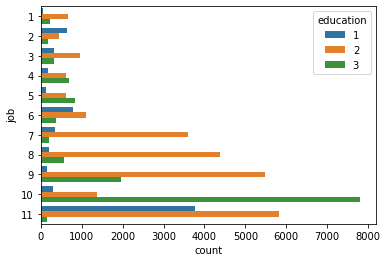

In [56]:
sns.countplot(y="job", hue="education", data=df2)

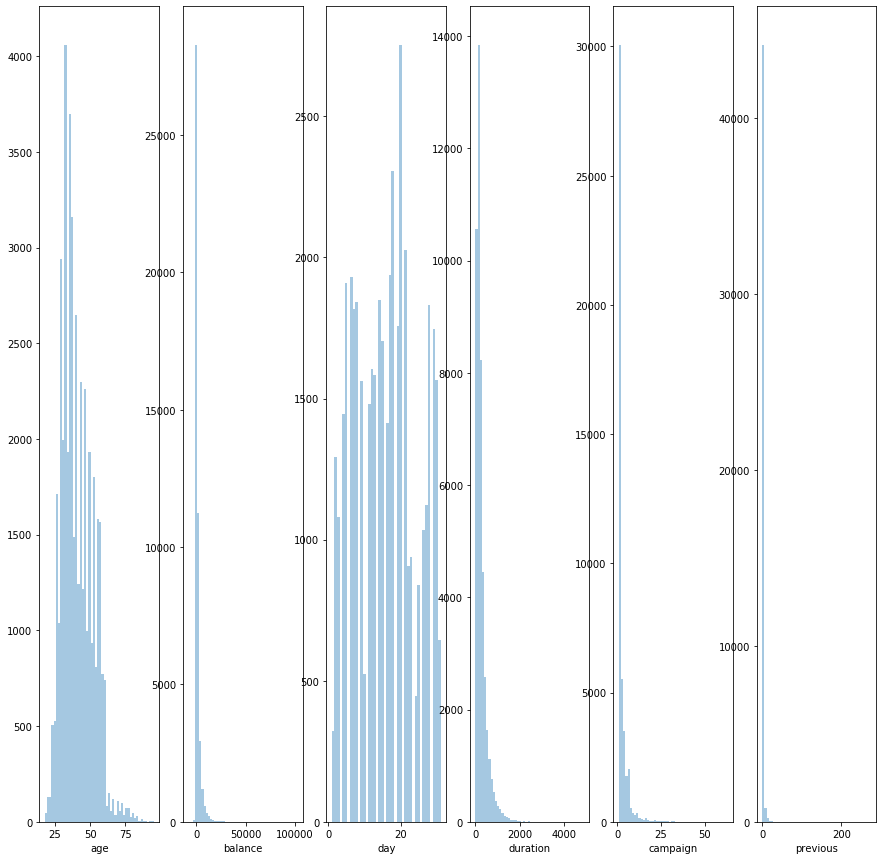

In [57]:
fig, axs = plt.subplots(ncols = 6, figsize = (15, 15))

sns.distplot(df['age'],kde = 0, ax = axs[0])
sns.distplot(df['balance'],kde = 0, ax = axs[1])
sns.distplot(df['day'],kde = 0, ax = axs[2])
sns.distplot(df['duration'],kde = 0, ax = axs[3])
sns.distplot(df['campaign'],kde = 0, ax = axs[4])
sns.distplot(df['previous'],kde = 0, ax = axs[5])



In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [59]:
#df2['balance'] = MinMaxScaler().fit_transform(df2[['balance']])

In [60]:
df2['balance'] = df2['balance'].abs()

### Balance: Eliminating negatives from Balance with absolute value

In [61]:
qw = df2['balance']
qw

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64

In [62]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,10,married,3,0,2143,1,0,2,5,2,261,1,-1,0,2,0
1,44,9,single,2,0,29,1,0,2,5,2,151,1,-1,0,2,0
2,33,4,married,2,0,2,1,1,2,5,2,76,1,-1,0,2,0
3,47,11,married,2,0,1506,1,0,2,5,2,92,1,-1,0,2,0
4,33,3,single,2,0,1,0,0,2,5,2,198,1,-1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,married,3,0,825,0,0,2,17,4,977,3,-1,0,2,1
45207,71,6,divorced,1,0,1729,0,0,2,17,4,456,2,-1,0,2,1
45208,72,6,married,2,0,5715,0,0,2,17,4,1127,5,184,3,3,1
45209,57,11,married,2,0,668,0,0,1,17,4,508,4,-1,0,2,0


In [63]:
##df['Age_Norm_Sklearn'] = MinMaxScaler().fit_transform(df[['Age']])

In [64]:

    
df2['age'] = MinMaxScaler().fit_transform(df[['age']])
df2['balance'] = MinMaxScaler().fit_transform(df[['balance']])
df2['day'] = MinMaxScaler().fit_transform(df[['day']])
df2['duration'] = MinMaxScaler().fit_transform(df[['duration']])
df2['campaign'] = MinMaxScaler().fit_transform(df[['campaign']])
df2['previous'] = MinMaxScaler().fit_transform(df[['previous']])    
    
    
    
    
    

### NORMALIZING OF VARIABLES ABOVE to look for a positive impact on the performance of the model

In [107]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,0.297873,0.137906,0.0,0.194805,0.272727,0.389610,1.0
job,45211.0,8.318086,2.618704,1.0,7.000000,9.000000,10.000000,11.0
education,45211.0,2.142664,0.652218,1.0,2.000000,2.000000,3.000000,3.0
default,45211.0,0.018027,0.133049,0.0,0.000000,0.000000,0.000000,1.0
balance,45211.0,0.085171,0.027643,0.0,0.073457,0.076871,0.085768,1.0
housing,45211.0,0.555838,0.496878,0.0,0.000000,1.000000,1.000000,1.0
loan,45211.0,0.160226,0.366820,0.0,0.000000,0.000000,0.000000,1.0
contact,45211.0,1.935724,0.245247,1.0,2.000000,2.000000,2.000000,2.0
day,45211.0,0.493547,0.277416,0.0,0.233333,0.500000,0.666667,1.0
month,45211.0,2.421048,0.813551,1.0,2.000000,2.000000,3.000000,4.0


In [67]:
mdf=pd.get_dummies(df2, columns=onehot)

In [68]:
mdf 

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single
0,0.519481,10,3,0,0.092259,1,0,2,0.133333,2,0.053070,0.000000,-1,0.000000,2,0,0,1,0
1,0.337662,9,2,0,0.073067,1,0,2,0.133333,2,0.030704,0.000000,-1,0.000000,2,0,0,0,1
2,0.194805,4,2,0,0.072822,1,1,2,0.133333,2,0.015453,0.000000,-1,0.000000,2,0,0,1,0
3,0.376623,11,2,0,0.086476,1,0,2,0.133333,2,0.018707,0.000000,-1,0.000000,2,0,0,1,0
4,0.194805,3,2,0,0.072812,0,0,2,0.133333,2,0.040260,0.000000,-1,0.000000,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,9,3,0,0.080293,0,0,2,0.533333,4,0.198658,0.032258,-1,0.000000,2,1,0,1,0
45207,0.688312,6,1,0,0.088501,0,0,2,0.533333,4,0.092721,0.016129,-1,0.000000,2,1,1,0,0
45208,0.701299,6,2,0,0.124689,0,0,2,0.533333,4,0.229158,0.064516,184,0.010909,3,1,0,1,0
45209,0.506494,11,2,0,0.078868,0,0,1,0.533333,4,0.103294,0.048387,-1,0.000000,2,0,0,1,0


### I am just Checking that data frame for model (mdf) is printing all variables and one hot encodings

### + SPLITTING DATA

In [69]:
X = mdf.drop("Target" , axis=1)
y = mdf.pop("Target")

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### + BUILDING THE TREE

In [71]:
dTg = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTg.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [72]:
print(dTg.score(X_train, y_train))
print(dTg.score(X_test, y_test))

1.0
0.8691388970805072


In [73]:
dTe = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTe.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [74]:
print(dTe.score(X_train, y_train))
print(dTe.score(X_test, y_test))

1.0
0.8670008846947803


### ++ REDUCE OVERFIT

In [75]:
dTgR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTgR.fit(X_train, y_train)
print(dTgR.score(X_train, y_train))
print(dTgR.score(X_test, y_test))

0.9003065061459222
0.9012828074314362


### Results with max depth 3 look good since score is 90% and test data sighly bigger wh entropy, i i will move on wh entropy since test data has better score

In [76]:
dTeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1)
dTeR.fit(X_train, y_train)
print(dTeR.score(X_train, y_train))
print(dTeR.score(X_test, y_test))

0.8997693304262647
0.9014302565614863


### Results with max depth 3 look good since score is 90% and test data sighly bigger wh entropy

### Tree wh entropy 

In [77]:
print (pd.DataFrame(dTeR.feature_importances_, columns = ["Importance"], index = X_train.columns))

                  Importance
age                 0.000000
job                 0.000000
education           0.000000
default             0.000000
balance             0.000000
housing             0.000000
loan                0.000000
contact             0.000000
day                 0.000000
month               0.000000
duration            0.692217
campaign            0.000000
pdays               0.000000
previous            0.000000
poutcome            0.307783
marital_divorced    0.000000
marital_married     0.000000
marital_single      0.000000


### Looks like only useful columns are duration & poutcome

0.9014302565614863


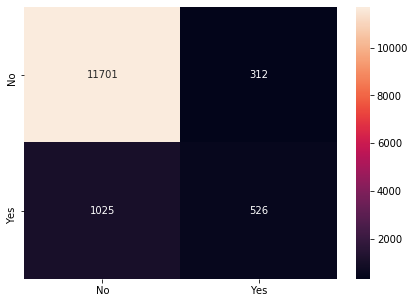

In [78]:
print(dTeR.score(X_test , y_test))
y_predict = dTeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [79]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score


In [80]:
print("Trainig accuracy",dTeR.score(X_train,y_train)*100)  
print("Testing accuracy",dTeR.score(X_test, y_test)*100)
print("Recall:",recall_score(y_test,y_predict)*100)
print("Precision:",precision_score(y_test,y_predict)*100)
print("F1 Score:",f1_score(y_test,y_predict)*100)
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Trainig accuracy 89.97693304262647
Testing accuracy 90.14302565614864
Recall: 33.91360412637008
Precision: 62.76849642004774
F1 Score: 44.03516115529511
Roc Auc Score: 0.6565820887247498


### ADABOST

In [81]:
X_trainab, X_testab, y_trainab, y_testab = train_test_split(X, y, test_size=.30, random_state=1)

In [82]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(base_estimator=dTeR, n_estimators = 50, random_state=1)
ab = ab.fit(X_trainab, y_trainab)

0.9005455617811855


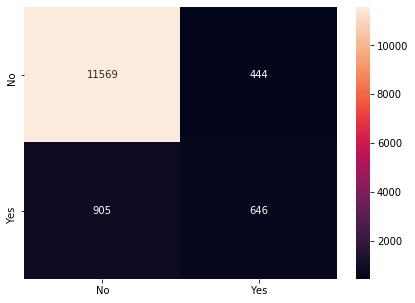

In [83]:
y_predictab = ab.predict(X_testab)
print(ab.score(X_testab, y_testab))
cmab=metrics.confusion_matrix(y_testab, y_predictab,labels=[0, 1])

df_cmab = pd.DataFrame(cmab, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmab, annot=True ,fmt='g')

In [84]:
print("Trainig accuracy",ab.score(X_trainab,y_trainab)*100)  
print("Testing accuracy",ab.score(X_testab, y_testab)*100)
print("Recall:",recall_score(y_testab,y_predictab)*100)
print("Precision:",precision_score(y_testab,y_predictab)*100)
print("F1 Score:",f1_score(y_testab,y_predictab)*100)
print("Roc Auc Score:",roc_auc_score(y_testab,y_predictab))

Trainig accuracy 91.17135905457073
Testing accuracy 90.05455617811855
Recall: 41.65054803352676
Precision: 59.26605504587156
F1 Score: 48.92086330935251
Roc Auc Score: 0.6897727601459905


In [85]:
a1 = ab.score(X_trainab,y_trainab)*100  
b1 = ab.score(X_testab, y_testab)*100
c1 = recall_score(y_testab,y_predictab)*100
d1 = precision_score(y_testab,y_predictab)*100
e1 = f1_score(y_testab,y_predictab)*100
f1 = roc_auc_score(y_testab,y_predictab)

### BAGGING

In [86]:
X_trainbg, X_testbg, y_trainbg, y_testbg = train_test_split(X, y, test_size=.30, random_state=1)

In [87]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(base_estimator=dTeR, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bg = bg.fit(X_trainbg, y_trainbg)


0.902241226776762


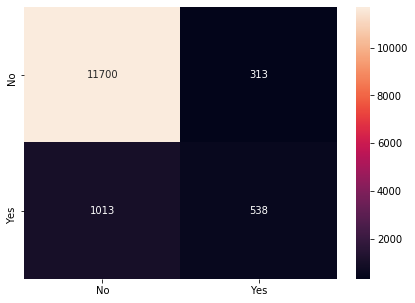

In [88]:
y_predictbg = bg.predict(X_testbg)
print(bg.score(X_testbg, y_testbg))
cmbg=metrics.confusion_matrix(y_testbg, y_predictbg,labels=[0, 1])

df_cmbg = pd.DataFrame(cmbg, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmbg, annot=True ,fmt='g')

In [89]:
print("Trainig accuracy",bg.score(X_trainbg,y_trainbg)*100)  
print("Testing accuracy",bg.score(X_testbg, y_testbg)*100)
print("Recall:",recall_score(y_testbg,y_predictbg)*100)
print("Precision:",precision_score(y_testbg,y_predictbg)*100)
print("F1 Score:",f1_score(y_testbg,y_predictbg)*100)
print("Roc Auc Score:",roc_auc_score(y_testbg,y_predictbg))

Trainig accuracy 90.08120832938351
Testing accuracy 90.2241226776762
Recall: 34.68729851708575
Precision: 63.21974148061105
F1 Score: 44.796003330557866
Roc Auc Score: 0.6604089391017027


In [90]:
a2 = bg.score(X_trainbg,y_trainbg)*100  
b2 = bg.score(X_testbg, y_testbg)*100
c2 = recall_score(y_testbg,y_predictbg)*100
d2 = precision_score(y_testbg,y_predictbg)*100
e2 = f1_score(y_testbg,y_predictbg)*100
f2 = roc_auc_score(y_testbg,y_predictbg)

### LOGISTIC REGRESSION

In [91]:
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X, y, test_size=.30, random_state=1)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression(random_state=42,penalty='l2', C = 1 ,solver= 'liblinear' ) 
lr.fit(X_trainlr, y_trainlr)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

0.8969330580949573


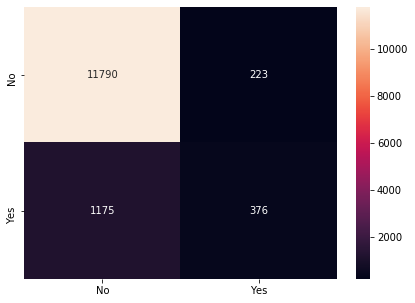

In [94]:
y_predictlr = lr.predict(X_testlr)
print(lr.score(X_testlr, y_testlr))
cmlr=metrics.confusion_matrix(y_testlr, y_predictlr,labels=[0, 1])

df_cmlr = pd.DataFrame(cmlr, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmlr, annot=True ,fmt='g')

In [95]:
print("Trainig accuracy",lr.score(X_trainlr,y_trainlr)*100)  
print("Testing accuracy",lr.score(X_testlr, y_testlr)*100)
print("Recall:",recall_score(y_testlr,y_predictlr)*100)
print("Precision:",precision_score(y_testlr,y_predictlr)*100)
print("F1 Score:",f1_score(y_testlr,y_predictlr)*100)
print("Roc Auc Score:",roc_auc_score(y_testlr,y_predictlr))

Trainig accuracy 89.7747021834613
Testing accuracy 89.69330580949573
Recall: 24.242424242424242
Precision: 62.77128547579299
F1 Score: 34.97674418604651
Roc Auc Score: 0.6119305096246742


In [96]:
a3 = lr.score(X_trainlr,y_trainlr)*100  
b3 = lr.score(X_testlr, y_testlr)*100
c3 = recall_score(y_testlr,y_predictlr)*100
d3 = precision_score(y_testlr,y_predictlr)*100
e3 = f1_score(y_testlr,y_predictlr)*100
f3 = roc_auc_score(y_testlr,y_predictlr)

### COMBINING DATAFRAME METRICS

In [97]:
compare = {"Ensemble model":['Adaboosting', 'Bagging', 'Logistic Regression'], "Trainig accuracy": [a1,a2,a3], "Testing accuracy": [b1,b2,b3], "Recall": [c1,c2,c3], "Precision": [d1,d2,d3], "F1 Score":[e1,e2,e3], "Roc Auc Score": [f1,f2,f3] }
compare

{'Ensemble model': ['Adaboosting', 'Bagging', 'Logistic Regression'],
 'Trainig accuracy': [91.17135905457073, 90.08120832938351, 89.7747021834613],
 'Testing accuracy': [90.05455617811855, 90.2241226776762, 89.69330580949573],
 'Recall': [41.65054803352676, 34.68729851708575, 24.242424242424242],
 'Precision': [59.26605504587156, 63.21974148061105, 62.77128547579299],
 'F1 Score': [48.92086330935251, 44.796003330557866, 34.97674418604651],
 'Roc Auc Score': [0.6897727601459905, 0.6604089391017027, 0.6119305096246742]}

In [99]:
metrics = pd.DataFrame(compare)
metrics

,Ensemble model,Trainig accuracy,Testing accuracy,Recall,Precision,F1 Score,Roc Auc Score
0,Adaboosting,91.171359,90.054556,41.650548,59.266055,48.920863,0.689773
1,Bagging,90.081208,90.224123,34.687299,63.219741,44.796003,0.660409
2,Logistic Regression,89.774702,89.693306,24.242424,62.771285,34.976744,0.611931


### +FALSE POSITIVE IS A COUSTOMER, PREDICTED THAT SUSCRIBED A TERM DEPOSIT WHEN NOT.
### -FALSE NEGATIVE IS A COUSTOMER, PREDICTED THAT DID NOT SUSCRIBE WHEN DID IT. 
### THE BANK WANTS TO KNOW IF THE COUSTOMER SUBSCRIBED OR NOT TO IMPROVE THEIR MARKETING BY TARGETING THE CORRECT COUSTOMERS. 
### WITH MORE CHANCES TO GET TERM DEPOSIT SUBSCRIPTION SO HIGH COST IS ASSOCIATED TO A FALSE POSITIVE BECAUSE THE MARKETING BUDGET IS GOING TO BE USED ON COUSTOMERS THAT DOES NOT WANT THE PRODUCT, THEREFORE WE ARE INTEREDT IN PRECISION, SO BAGGING IS THE BEST ENSEMBLE MODEL BECUASE THE PRECISION IS THE HIGHEST AND IT IS NOT OVERFIITED. IF FOCUS ON RECALL WE MAY BE MORE INTERESTED IN THE OPPORTUBITY COST.